In [10]:
import re
import json
import pandas as pd

In [14]:
with open('results_sparse_output.txt', 'r') as file:
    results = file.readlines()

In [15]:
params = []
for line in results:
    params.extend(re.findall("^\{.*$", line))
params = [json.loads(p.replace("\'", "\"")) for p in params]

In [16]:
metrics = ["MAE", "MAPE", "SMAPE", "RMSE"]
for metric in metrics:
    metric_list = []
    for line in results:
        metric_list.extend(re.findall("(?<="+metric+": )[0-9.]+", line))
    for i in range(len(params)):
        params[i][metric] = float(metric_list[i])
    

In [25]:
df = pd.DataFrame.from_records(params)
df.to_csv('tuning_results.csv')

In [20]:
import seaborn as sns

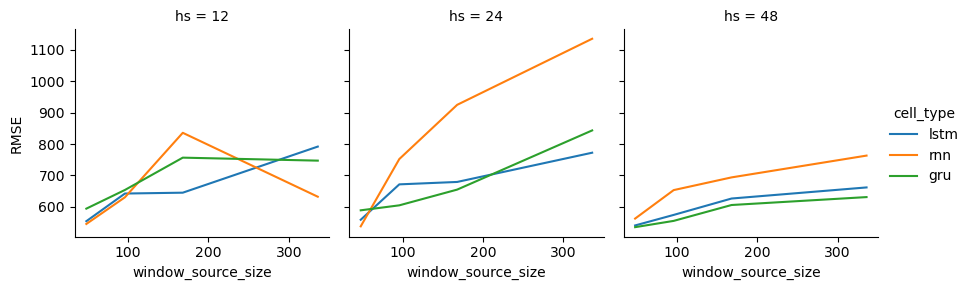

In [24]:
g = sns.FacetGrid(df, col='hs', hue='cell_type')
g.map(sns.lineplot, 'window_source_size', 'RMSE')
g.add_legend()